
3_vectorizing   
2_topic_modeling   
24.4.22 정리   

1. 자연어 처리 정제   
 1.1 정규화 (한글만 추출, 2개이상 공백 -> 1개의 공백)   
2. 형태소   
 2.1 명사, 동사, 형용사 추출   
3. 벡터화 (문자 -> 수치변환)   
 3.1 countvectorize -> 문서 내 단어빈도   
 3.2 tfidfvectorize (countvectorize + tfidftransform)   
  -> TF : 문서 내 단어의 빈도   
  -> IDF : 단어의 빈도수와 그 단어가 나타내는 문서수의 반비례   
4. 토픽 모델링(LDA)   


In [29]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.", 
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."
         ]

In [84]:
import pandas as pd
import numpy as np

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cvect = CountVectorizer()
# X = cvect.fit_transform(corpus)  # 밑에 두줄 한문장으로
X = cvect.fit(corpus)             # 학습(토큰화)
X = cvect.transform(corpus)      # 변환(수치화)
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [33]:
cvect = CountVectorizer()
X = cvect.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [34]:
df = pd.DataFrame(corpus, columns=['문서'])
df

,문서
0,코로나 거리두기와 코로나 상생지원금 문의입니다.
1,지하철 운행시간과 지하철 요금 문의입니다.
2,지하철 승강장 문의입니다.
3,코로나 선별진료소 문의입니다.
4,버스 운행시간 문의입니다.
5,버스 터미널 위치 안내입니다.
6,코로나 거리두기 안내입니다.
7,택시 승강장 문의입니다.


In [35]:
df['문의'] = df['문서'].str.contains('문의')
df

,문서,문의
0,코로나 거리두기와 코로나 상생지원금 문의입니다.,True
1,지하철 운행시간과 지하철 요금 문의입니다.,True
2,지하철 승강장 문의입니다.,True
3,코로나 선별진료소 문의입니다.,True
4,버스 운행시간 문의입니다.,True
5,버스 터미널 위치 안내입니다.,False
6,코로나 거리두기 안내입니다.,False
7,택시 승강장 문의입니다.,True


In [36]:
# 문의 vs 안내 , 문의 인 것만 출력
문의 = df.loc[df['문의'], '문서']
안내 = df.loc[~df['문의'], '문서']
문의, 안내

(0    코로나 거리두기와 코로나 상생지원금 문의입니다.
 1       지하철 운행시간과 지하철 요금 문의입니다.
 2                지하철 승강장 문의입니다.
 3              코로나 선별진료소 문의입니다.
 4                버스 운행시간 문의입니다.
 7                 택시 승강장 문의입니다.
 Name: 문서, dtype: object,
 5    버스 터미널 위치 안내입니다.
 6     코로나 거리두기 안내입니다.
 Name: 문서, dtype: object)

In [40]:
cvect = CountVectorizer()
문의_벡터 = cvect.fit_transform(문의) # ★★★ 학습은 문의로만
pd.DataFrame(문의_벡터.toarray(), columns=cvect.get_feature_names_out())

,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,요금,운행시간,운행시간과,지하철,코로나,택시
0,1,1,0,1,0,0,0,0,0,0,2,0
1,0,1,0,0,0,0,1,0,1,2,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,0,1


In [41]:
안내_벡터 = cvect.transform(안내) # ★★★ 문의로 학습한걸 가지고 벡터화
pd.DataFrame(안내_벡터.toarray(), columns=cvect.get_feature_names_out())

,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,요금,운행시간,운행시간과,지하철,코로나,택시
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0


In [42]:
# 위와 학습한게 다르기 때문에 다르게 나옴
cvect = CountVectorizer()
안내_벡터 = cvect.fit_transform(안내)
pd.DataFrame(안내_벡터.toarray(), columns=cvect.get_feature_names_out())

,거리두기,버스,안내입니다,위치,코로나,터미널
0,0,1,1,1,0,1
1,1,0,1,0,1,0


### CounterVectorize

* analyzer
    * 기본값 : 'word'
    * 종류 : 'word', 'char', 'char_wb'
    * 함수 : 토큰화 방법
    
* N-gram
    * 토큰을 몇 개 사용할 것인지를 구분함, 지정한 n개의 숫자 만큼의 토큰을 묶어서 사용
   
* min_df : 최소문서 빈도 설정하기 (전체문서에서 단어나 나타날 수 있는 최대 문서 비율)
   * 정수값 : 전체문서에서 n개 이하 제외
   * 실수값 : 전체문서에서 % 이하 제외
   
* max_df : 최대문서 빈도 설정하기 (전체문서에서 단어나 나타날 수 있는 최소 문서 비율)
   * 정수값 : 전체문서에서 n개 이상 제외
   * 실수값 : 전체문서에서 % 이상 제외
   
* stop_words : 의미없는 키워드(불용어) 제외

* max_features : 학습할 최대 어휘 수

In [47]:
cvect = CountVectorizer(ngram_range=(1,2))
X = cvect.fit_transform(corpus)
dtm = X.toarray()
dtm

array([[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]],

In [44]:
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

In [45]:
pd.DataFrame(dtm, columns=cvect.get_feature_names_out()).style.background_gradient()

,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [52]:
cvect = CountVectorizer(min_df=0.2) # 20% 이하 제외
X = cvect.fit_transform(corpus)
dtm = X.toarray()
dtm

array([[1, 0, 0, 0, 0, 2],
       [1, 0, 0, 0, 2, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0]], dtype=int64)

In [66]:
stop_words = ['코로나', '문의입니다']
cvect = CountVectorizer(ngram_range=(1, 6), min_df=1, max_df=0.9, max_features=10, stop_words=stop_words)
cvect

CountVectorizer(max_df=0.9, max_features=10, ngram_range=(1, 6),
                stop_words=['코로나', '문의입니다'])

In [67]:
cvect.fit_transform(corpus)
cvect.get_feature_names_out()

array(['거리두기', '버스', '승강장', '안내입니다', '지하철', '지하철 운행시간과 지하철',
       '지하철 운행시간과 지하철 요금', '택시', '택시 승강장', '터미널'], dtype=object)

In [69]:
cvect = CountVectorizer(analyzer='char', ngram_range=(1, 6), min_df=1, max_df=0.9, max_features=10)
cvect.fit_transform(corpus)
cvect.get_feature_names_out()

array([' 문', ' 문의입', ' 문의입니', ' 문의입니다', '문', '문의입', '문의입니', '문의입니다',
       '문의입니다.', '의'], dtype=object)

### TF-IDF(Term Frequency_Inverse Document Frequency)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer # Contvectorize + TffidTransformer

In [88]:
tfidvect = TfidfVectorizer()
X = tfidvect.fit_transform(corpus)
X

<8x16 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [89]:
# TF : 문서에 토큰이 많이 나타날수록 가중치는 더 커진다.
# IDF : 그러나 토큰이 여러 문서에 많이 등장할수록 가중치는 감소한다.
dtm = X.toarray()   # TF * IDF
dtm

array([[0.        , 0.47991911, 0.23982075, 0.        , 0.47991911,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.69414789, 0.        ,
        0.        ],
       [0.        , 0.        , 0.22216587, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.44458893, 0.        ,
        0.44458893, 0.        , 0.74520044, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.38849954, 0.        , 0.        ,
        0.        , 0.65156278, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.65156278, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.37531751, 0.        , 0.        ,
        0.7510695 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5431679 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.35765909, 0.59983945, 0.        ,
        0.        , 0.        , 

In [103]:
df = pd.DataFrame(dtm, columns=tfidvect.get_feature_names_out())
df

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0.000000,0.479919,0.239821,0.000000,0.479919,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694148,0.000000,0.000000
1,0.000000,0.000000,0.222166,0.000000,0.000000,0.00000,0.000000,0.000000,0.444589,0.000000,0.444589,0.000000,0.745200,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.388500,0.000000,0.000000,0.00000,0.651563,0.000000,0.000000,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.375318,0.000000,0.000000,0.75107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.543168,0.000000,0.000000
4,0.000000,0.000000,0.357659,0.599839,0.000000,0.00000,0.000000,0.000000,0.000000,0.715732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.454195,0.000000,0.00000,0.000000,0.454195,0.000000,0.000000,0.000000,0.541948,0.000000,0.000000,0.000000,0.541948
6,0.670344,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.561801,0.000000,0.000000,0.000000,0.000000,0.000000,0.484788,0.000000,0.000000
7,0.000000,0.000000,0.357659,0.000000,0.000000,0.00000,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000


In [104]:
df.sum().sort_values(ascending=False)

문의입니다    1.941122
코로나      1.722104
지하철      1.396763
승강장      1.251402
버스       1.054034
안내입니다    1.015995
선별진료소    0.751070
운행시간     0.715732
택시       0.715732
거리두기     0.670344
위치       0.541948
터미널      0.541948
거리두기와    0.479919
상생지원금    0.479919
요금       0.444589
운행시간과    0.444589
dtype: float64

In [105]:
tfidvect.idf_

array([2.5040774 , 2.5040774 , 1.25131443, 2.09861229, 2.5040774 ,
       2.5040774 , 2.09861229, 2.09861229, 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.09861229, 1.81093022, 2.5040774 ,
       2.5040774 ])

In [106]:
vocab = tfidvect.get_feature_names_out()
vocab

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [108]:
idf_dict = dict(zip(vocab, tfidvect.idf_))
idf_dict

{'거리두기': 2.504077396776274,
 '거리두기와': 2.504077396776274,
 '문의입니다': 1.251314428280906,
 '버스': 2.09861228866811,
 '상생지원금': 2.504077396776274,
 '선별진료소': 2.504077396776274,
 '승강장': 2.09861228866811,
 '안내입니다': 2.09861228866811,
 '요금': 2.504077396776274,
 '운행시간': 2.504077396776274,
 '운행시간과': 2.504077396776274,
 '위치': 2.504077396776274,
 '지하철': 2.09861228866811,
 '코로나': 1.8109302162163288,
 '택시': 2.504077396776274,
 '터미널': 2.504077396776274}

In [109]:
pd.Series(idf_dict).sort_values(ascending=False)

거리두기     2.504077
거리두기와    2.504077
상생지원금    2.504077
선별진료소    2.504077
요금       2.504077
운행시간     2.504077
운행시간과    2.504077
위치       2.504077
택시       2.504077
터미널      2.504077
버스       2.098612
승강장      2.098612
안내입니다    2.098612
지하철      2.098612
코로나      1.810930
문의입니다    1.251314
dtype: float64

In [111]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

<Axes: >

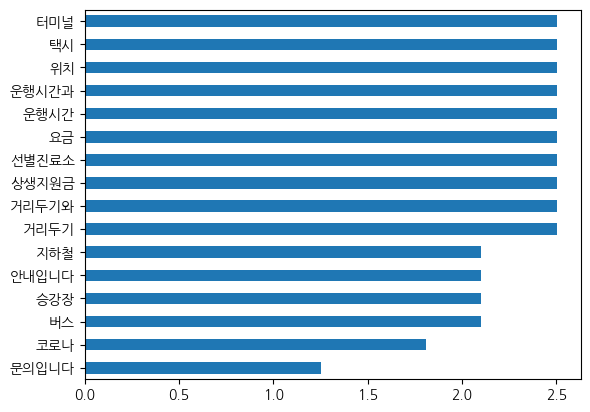

In [114]:
pd.Series(idf_dict).sort_values(ascending=True).plot.barh()